<a href="https://colab.research.google.com/github/hamagami/is2021/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression(Gradient method)

In [2]:
#import numpy, sklern(for dataset), and matplotlib(for graph)
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

Load Boston hausing dataset

In [3]:
#Housing dataset contains information about different houses in Boston.
boston = load_boston()

In [4]:
# Boston dataset has 13 predictor variables. 
# This example only uses 5th variable (RM: Average number of rooms per dwelling) as x.
x = boston.data[:, 5]
# y is a response variable which means the value of prices of the house.
y = boston.target
# The regression predicts y from x  (y=w_1 x + w_2)

Gradient method

In [5]:
##### Initializations
np.random.seed(1234)
# it's little tricky... 
large_x = np.array([[1, v] for v in x])

#Initializing weight values
beta = np.random.random(len(large_x[0]))

# Learning rate
alpha = 0.01

# progress results
b_100 = []
b_1000 = []
b_10000 = []

In [6]:
for i in range(10000):
        # predicting y_hat
        y_hat = np.dot(large_x, beta)  
     
        # derivative of the loss with respect to x
        dbeta = np.dot((y - y_hat), large_x) / len(large_x)  
      
        # updating w with alpha and dw
        beta += alpha * dbeta 
        # saving progress result
        if i == 100-1:
            b_100 = np.copy(beta)
        elif i == 1000-1:
            b_1000 = np.copy(beta)
        elif i == 10000-1:
            b_10000 = np.copy(beta)
            

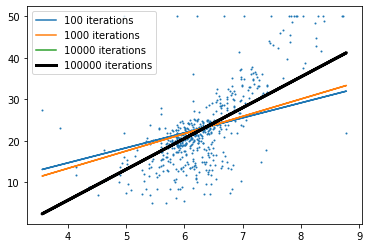

In [7]:
# Drawing results 
# plot original data
plt.scatter(x, y, s=1)
 
# drawing results 
plt.plot(x, np.dot(large_x, b_100), label='100 iterations')
plt.plot(x, np.dot(large_x, b_1000), label='1000 iterations')
plt.plot(x, np.dot(large_x, b_10000), label='10000 iterations')
plt.plot(x, np.dot(large_x, beta), c='black', linewidth=3.0, label='100000 iterations')
 
plt.legend()
plt.show()

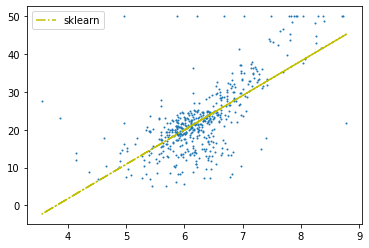

In [8]:
# You can use sklearn method LinearRegression
# Too easy...
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(large_x, y)
pred = lr.predict(large_x)

plt.scatter(x, y, s=1)
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
 
plt.legend()
plt.show()

In [9]:
beta

array([-24.05760667,   7.43368936])